# Graph Convolutional Networks: Spectral Learning on Graphs
## From Fourier Analysis to Graph Signal Processing

Graph Convolutional Networks represent a mathematical breakthrough that bridges classical signal processing with modern deep learning. While traditional CNNs work with regular grids (like image pixels), GCNs extend the concept of convolution to irregular graph structures using principles from **spectral graph theory**.

The elegance of GCNs lies in their mathematical foundation: they perform convolution in the spectral domain of graphs, then cleverly approximate this operation to make it computationally tractable. This creates a direct generalization of CNNs to any graph structure - from social networks to molecular compounds.

def create_gcn_spectral_animation():
    """
    Creates visualization of spectral convolution and localization in GCNs
    """
    import networkx as nx
    import numpy as np
    from scipy.linalg import eigh
    
    # Create a simple graph
    G = nx.cycle_graph(8)  # Circular graph for clear visualization
    A = nx.adjacency_matrix(G).toarray()
    
    # Compute normalized Laplacian
    D = np.diag(np.sum(A, axis=1))
    L = D - A  # Combinatorial Laplacian
    
    # Normalized Laplacian
    D_sqrt_inv = np.diag(1.0 / np.sqrt(np.sum(A, axis=1) + 1e-8))
    L_norm = np.eye(8) - D_sqrt_inv @ A @ D_sqrt_inv
    
    # Eigendecomposition
    eigenvalues, eigenvectors = eigh(L_norm)
    
    # Position nodes in circle
    pos = {i: (np.cos(2*np.pi*i/8), np.sin(2*np.pi*i/8)) for i in range(8)}
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('🌊 Spectral Graph Convolution: From Theory to Practice', fontsize=16, fontweight='bold')
    
    # Step 1: Original Graph
    ax = axes[0, 0]
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=800, font_size=12, font_weight='bold', ax=ax)
    ax.set_title('Step 1: Graph Structure\nCircular graph with 8 nodes', fontsize=12, fontweight='bold')
    
    # Step 2: Laplacian Eigenvalues
    ax = axes[0, 1]
    ax.plot(eigenvalues, 'bo-', linewidth=2, markersize=8)
    ax.set_title('Step 2: Laplacian Spectrum\nEigenvalues (graph frequencies)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Eigenvalue Index')
    ax.set_ylabel('Eigenvalue')
    ax.grid(True, alpha=0.3)
    
    # Add frequency interpretation
    ax.annotate('Low freq\n(smooth)', xy=(0, eigenvalues[0]), xytext=(1, eigenvalues[0]+0.3),
               arrowprops=dict(arrowstyle='->', color='green'),
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
    ax.annotate('High freq\n(oscillatory)', xy=(7, eigenvalues[7]), xytext=(6, eigenvalues[7]+0.3),
               arrowprops=dict(arrowstyle='->', color='red'),
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))
    
    # Step 3: Eigenvector Visualization (first few)
    ax = axes[0, 2]
    # Show first 3 eigenvectors as node colors
    for i in range(3):
        eigenvec = eigenvectors[:, i]
        # Normalize for color mapping
        colors = [(val - min(eigenvec)) / (max(eigenvec) - min(eigenvec)) for val in eigenvec]
        
        # Create subplot positions
        if i == 0:
            subplot_pos = (0.1 + i*0.25, 0.55, 0.2, 0.2)
        else:
            subplot_pos = (0.1 + i*0.25, 0.55, 0.2, 0.2)
        
        ax_sub = fig.add_axes(subplot_pos)
        nx.draw(G, pos, node_color=colors, cmap='RdBu', with_labels=True,
               node_size=400, font_size=8, ax=ax_sub)
        ax_sub.set_title(f'Eigenvector {i}\nλ={eigenvalues[i]:.2f}', fontsize=8)
    
    ax.remove()  # Remove the main subplot since we used subplots
    
    # Step 4: Localized vs Global Convolution
    ax = axes[1, 0]
    # Show how polynomial approximation localizes convolution
    center_node = 0
    k_hops = [1, 2, 3]
    colors = ['red', 'orange', 'yellow', 'lightgray']
    
    node_colors = ['lightgray'] * 8
    node_colors[center_node] = 'red'  # Center node
    
    # Color nodes by hop distance
    for hop in k_hops:
        for node in G.nodes():
            try:
                distance = nx.shortest_path_length(G, center_node, node)
                if distance == hop and hop <= 2:
                    node_colors[node] = colors[hop]
            except:
                pass
    
    nx.draw(G, pos, node_color=node_colors, with_labels=True, 
            node_size=800, font_size=12, font_weight='bold', ax=ax)
    ax.set_title('Step 4: Localized Convolution\nK-hop neighborhood (K=2)', fontsize=12, fontweight='bold')
    
    # Add legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Center'),
                      plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='1-hop'),
                      plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='2-hop')]
    ax.legend(handles=legend_elements, loc='upper right')
    
    # Step 5: GCN Layer Operation
    ax = axes[1, 1]
    
    # Simulate feature propagation
    features = np.random.randn(8, 3)  # 8 nodes, 3 features each
    
    # Simple GCN operation: H' = σ(AHW)
    # For visualization, we'll show the aggregation step
    im = ax.imshow(A, cmap='Blues', alpha=0.8)
    ax.set_title('Step 5: Adjacency Matrix\nDefines neighbor aggregation', fontsize=12, fontweight='bold')
    
    # Add values to adjacency matrix
    for i in range(8):
        for j in range(8):
            ax.text(j, i, int(A[i, j]), ha='center', va='center', 
                   color='white' if A[i, j] > 0.5 else 'black', fontweight='bold')
    
    ax.set_xlabel('Node j')
    ax.set_ylabel('Node i')
    
    # Step 6: Mathematical Formula
    ax = axes[1, 2]
    ax.axis('off')
    
    formula_text = """
    🧮 GCN Mathematical Foundation:
    
    📊 Spectral Convolution:
    g_θ ⋆ x = U g_θ(Λ) U^T x
    
    🎯 Polynomial Approximation:
    g_θ(Λ) ≈ Σ^K_{k=0} θ_k T_k(Λ̃)
    
    ⚡ GCN Simplification:
    H^(l+1) = σ(Ã H^(l) W^(l))
    
    Where:
    • Ã = D̃^(-½) (A + I) D̃^(-½)
    • D̃ = Degree matrix
    • U = Eigenvectors
    • Λ = Eigenvalues
    • T_k = Chebyshev polynomials
    
    💡 Key Insight:
    Spectral → Polynomial → Linear!
    """
    
    ax.text(0.05, 0.95, formula_text, transform=ax.transAxes, fontsize=10,
           verticalalignment='top', 
           bbox=dict(boxstyle="round,pad=0.5", facecolor="lightcyan", alpha=0.8))
    
    plt.tight_layout()
    plt.show()

# Create the spectral convolution animation
print("🌊 Understanding Spectral Graph Convolution")
create_gcn_spectral_animation()

## The Spectral Foundation of Graph Convolution

The brilliance of GCNs lies in their mathematical foundation rooted in **spectral graph theory**. Just as traditional CNNs leverage the shift-invariance of image convolutions, GCNs exploit the eigenstructure of graphs through the **graph Laplacian**.

### 🌊 The Spectral Perspective:

**Graph Signals**: Node features are treated as signals defined on graph vertices  
**Graph Fourier Transform**: Decomposition using Laplacian eigenvectors  
**Spectral Convolution**: Multiplication in the frequency domain  
**Localization**: Polynomial approximation makes it computationally feasible

Each GCN layer performs a **localized spectral convolution** - it processes information within a node's K-hop neighborhood, where K is determined by the polynomial degree. This creates a natural hierarchy: deeper layers capture increasingly global graph patterns.

<p style='text-align:center'><img src='https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-23_at_4.06.05_PM.png'></p>

### Difference between GNN and GCN : 

#### Think of base GNNs as a framework that:

+ Compute messages

+ Aggregate them

+ Update node features

#### A GCN is one instantiation of that framework where you:

+ Combine steps 1+2 via a normalized adjacency matrix (averaging neighbor features)

+ Use a single linear transform + activation for updating

In [1]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.8 MB/s eta 0:00:00


In [2]:
# Enhanced imports for Graph Convolutional Networks
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import networkx as nx
from scipy.linalg import eigh
import torch
from torch import nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.datasets import Planetoid
from torch_geometric.data import Data
from torch_geometric.utils import to_dense_adj, add_self_loops
from sklearn.manifold import TSNE
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import HTML, display

# Configure environment
plt.style.use('default')
%matplotlib inline
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'🌊 GCN Computing Device: {device}')

## Dataset: Cora

+ A citation network of scientific papers
+ Nodes: 2,708 research papers
+ Edges: Citation relationships (5,429 edges)
+ Features: 1,433-dimensional bag-of-words vectors
+ Task: Classify papers into 7 research areas

In [3]:
def load_dataset():
    print('..Loading Dataset../n')
    dataset = Planetoid(root = 'data/Cora', name='Cora');
    data = dataset[0];
    print(f'Dataset                   : {dataset}')
    print(f'Number of graphs          : {len(dataset)}')
    print(f'Number of nodes           : {data.x.shape[0]}')
    print(f'Number of edges           : {data.edge_index.shape[1]}')
    print(f'Number of node features   : {data.x.shape[1]}')
    print(f'Number of classes         : {dataset.num_classes}')
    print(f'Number of training nodes  : {data.train_mask.sum()}')
    print(f'Number of validation nodes: {data.val_mask.sum()}')
    print(f'Number of test nodes      : {data.test_mask.sum()}')
    print()
    return data, dataset.num_classes

## Model Architecture Breakdown
+ A GCN applies repeated rounds of “neighborhood averaging + linear transformation + nonlinearity”, implemented efficiently via normalized adjacency matrix multiplication. 
+ You stack a few such layers, and finally decode the resulting node embeddings with a softmax (for nodes) or a global readout + MLP (for graphs).
+ The core abstraction is that each layer smooths features across the graph structure and then mixes them through learnable weights.

for more details : <a>https://arxiv.org/abs/1609.02907v4</a>

<p style='text-align:center'><img src='https://cdn.prod.website-files.com/653987c1e50cf8f938ffd18a/65cd30d56868130a067ae46b_616c48b2faef59d143ef6a4f_3B2YByoRwIDHupMT8zI2seOkl4ETPP0DySySOV55aF2R5mPyksmbYgLZuXCrAKWJ5OzmtCqpeqXEb409Mf4NMfM7iJ7zhcEpOY5oirZ--Ap8904oleE-Y03xlq8rhIvs5hNBECYM.png'></p>

In [4]:
def train(model, data, epochs=200):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
    loss_fn = nn.CrossEntropyLoss()
    
    model.train()
    train_l = []
    val_accuracy = []
    print("..Training Model..\n")
    for epoch in range(epochs+1):
        optimizer.zero_grad()
        pred = model(data.x, data.edge_index)
        loss = loss_fn(pred[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            pred = pred.argmax(dim=1)
            val_acc = (pred[data.val_mask] == data.y[data.val_mask]).float().mean()
        model.train()
        train_l.append(loss.item())
        val_accuracy.append(val_acc.item())

        if epoch%20 == 0:
            print(f'Epoch {epoch}/{epochs},  Loss : {loss:.4f},  Val acc : {val_acc:.4f}')

    print('\n..Training Complete..\n')
    
    return model, train_l, val_accuracy

In [5]:
def evaluate_model(model, data):
    model.eval()
    with torch.no_grad():
        embed = model(data.x, data.edge_index).argmax(dim=1)
        test_acc = (embed[data.test_mask] == data.y[test_mask]).float().mean()
        print(f'\nAccuracy on test set : {test_acc:.4f}\n')

In [6]:
def visualize_results(t_l, v_l):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    ax[0].plot(t_l)
    ax[0].set_title('Training Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].grid(True)

    ax[1].plot(t_l)
    ax[1].set_title('Validation accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

In [7]:
def visualize_embed(model, data, num_classes):
    model.eval()
    with torch.no_grad():
        embed = model(data.x, data.edge_index)
        tsne = TSNE(n_components=2)
        embed_2d = tsne.fit_transform(embed.cpu().numpy())
        plt.figure(figsize=(10, 8))
        colors = plt.cm.Set3(np.linspace(0,1,num_classes))

        for i in range(num_classes):
            mask = data.y.cpu().numpy() == i
            plt.scatter(embed_2d[mask, 0], embed_2d[mask, 1], c = [colors[i]], label=f'Class {i}', alpha=  0.85)
        plt.title('Node Embeddings plotted using Dimensionality reduction (t-sne)')
        plt.legend()
        plt.grid(True, alpha = 0.6)
        plt.show()

In [8]:
data, num_classes = load_dataset()
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

..Loading Dataset../n


Dataset                   : Cora()
Number of graphs          : 1
Number of nodes           : 2708
Number of edges           : 10556
Number of node features   : 1433
Number of classes         : 7
Number of training nodes  : 140
Number of validation nodes: 500
Number of test nodes      : 1000



Processing...
Done!


## Simple GNN with average aggreator

In [9]:
class GNN(nn.Module):
    def __init__(self, inp_dim, hidden_dim, out_dim, num_layers=2):
        super(GNN, self).__init__()
        self.num_layers = num_layers
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(inp_dim, hidden_dim))
        for _ in range(num_layers-2):
            self.layers.append(nn.Linear(hidden_dim, hidden_dim))
        self.layers.append(nn.Linear(hidden_dim, out_dim))
        self.dropout = nn.Dropout(0.5)

    def agg_neighbors(self, x, edge_index):
        # x : (num_nodes, feature_dim)
        # edge_index : (2, num_edge)
        device = x.device
        num_nodes = x.shape[0]
        agg = torch.zeros_like(x)
        neighbor_count = torch.zeros(num_nodes, dtype=torch.float, device = device)
        src_nodes = edge_index[0]
        tgt_nodes = edge_index[1]

        # for each node add src node features to tgt node's agg
        for i in range(edge_index.size(1)):
            src = src_nodes[i]
            tgt = tgt_nodes[i]

            # adding src node features to tgt node's agg
            agg[tgt] += x[src]
            neighbor_count[tgt] += 1

        neighbor_count = torch.clamp(neighbor_count, min = 1.0)
        agg = agg/neighbor_count.unsqueeze(1)
        return agg

    def forward(self, x, edge_ind):
        # returns embeddings after GNN processing
        for i, layer in enumerate(self.layers):
            agg_feat = self.agg_neighbors(x, edge_ind)
            x = agg_feat
            x = layer(x)
            if i < len(self.layers) - 1:
                x = F.relu(x)
                x = self.dropout(x)
        return x

Number of parameter : 184455

Model Architecture:
GNN(
  (layers): ModuleList(
    (0): Linear(in_features=1433, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=7, bias=True)
  )
  (dropout): Dropout(p=0.5, inplace=False)
)

..Training Model..

Epoch 0/100,  Loss : 1.9442,  Val acc : 0.0580
Epoch 20/100,  Loss : 0.0063,  Val acc : 0.7640
Epoch 40/100,  Loss : 0.0077,  Val acc : 0.7640
Epoch 60/100,  Loss : 0.0158,  Val acc : 0.7700
Epoch 80/100,  Loss : 0.0117,  Val acc : 0.7680
Epoch 100/100,  Loss : 0.0109,  Val acc : 0.7800

..Training Complete..



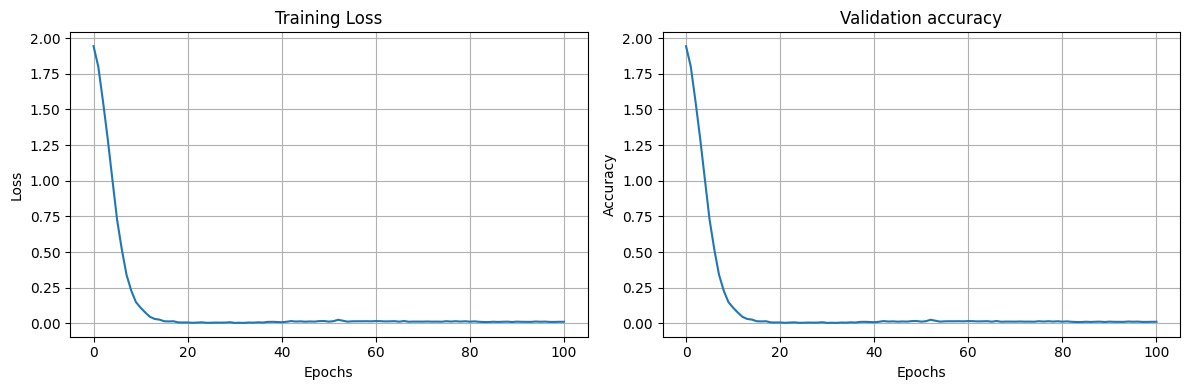

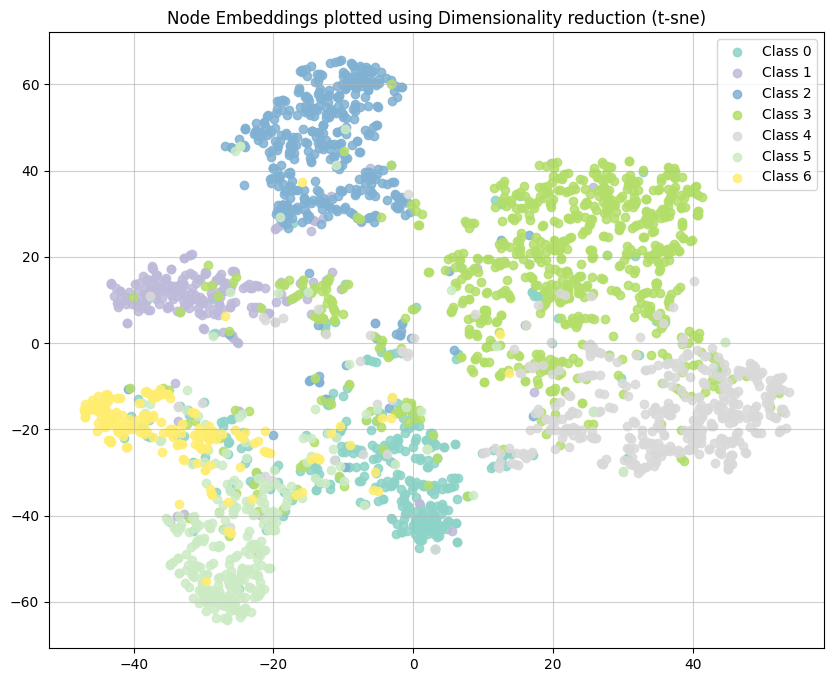

In [10]:
Graph_nn = GNN(
    inp_dim = data.x.shape[1], # 1433 features for CORA
    hidden_dim = 128,
    out_dim = num_classes,
    num_layers = 2
)
print(f"Number of parameter : {sum(p.numel() for p in Graph_nn.parameters())}\n")
print('Model Architecture:')
print(Graph_nn)
print()

Graph_nn, data = Graph_nn.to(device), data.to(device)

Graph_nn, train_loss, val_accuracy = train(Graph_nn, data, epochs = 100)

visualize_results(train_loss, val_accuracy)
visualize_embed(Graph_nn, data, num_classes)

## Custom Graph Convolvution network

The equation to calculate the hidden output from the previous can be generalized as: 

<p style='text-align:center'><img src='https://miro.medium.com/v2/resize:fit:1100/format:webp/1*QajhZ8QiKDE1I9wf3uOavQ.png'></p>

Different choices of f result in different variants of the models. As a preview, the GCN paper applies the propagation rule below

<p style='text-align:center'><img src='https://www.graphable.ai/wp-content/uploads/2022/09/image-18-1024x481.png'></p>

<p style='text-align:center'>or in closed form</p>

<p style='text-align:center'><img src='https://miro.medium.com/v2/resize:fit:1400/1*mFzCYa-PG3mUAZQE6oQASg.png'></p>

<caption>source : https://jonathan-hui.medium.com/graph-convolutional-networks-gcn-pooling-839184205692</caption>

In [11]:
class GCNlayer(nn.Module):
    def __init__(self, in_feat, out_feat):
        super(GCNlayer, self).__init__()
        self.in_feat = in_feat
        self.out_feat = out_feat

        self.W = nn.Parameter(torch.FloatTensor(in_feat, out_feat))
        self.B = nn.Parameter(torch.FloatTensor(out_feat))

        self.reset_param()

    def reset_param(self):
        nn.init.xavier_uniform_(self.W)
        nn.init.zeros_(self.B)

    def forward(self, x, edges):
        # x : (N, D)   edges: (2, E) as [[src], [tgt]]
        N = x.size(0)

        edge_w_sloops, _ = add_self_loops(edges, num_nodes = N)

        # Calculating node degrees for normalization
        row, col = edge_w_sloops
        deg = torch.zeros(N, device = x.device)
        deg.scatter_add_(0, row, torch.ones(row.size(0), device=x.device))

        # compute normalization coefficients given by 1/(sqrt(deg(i) * deg(j)))
        deg_inv_sqrt = deg.pow(-0.5)
        deg_inv_sqrt[deg_inv_sqrt == float('inf')] = 0
        norm = deg_inv_sqrt[row] * deg_inv_sqrt[col]

        x_trans = torch.mm(x, self.W)
        out = torch.zeros_like(x_trans)

        messages = x_trans[row] * norm.view(-1, 1)
        out.scatter_add_(0, col.view(-1,1).expand(-1, x_trans.size(1)), messages)

        return out + self.B

<p style='text-align:center'><img src='https://miro.medium.com/v2/resize:fit:1100/format:webp/1*mxSjmL-mPk50f4KEiteVig.png'></p>

In [12]:
class GCN(nn.Module):
    def __init__(self, inp_dim, hidden_dim, out_dim, num_layers = 2, dropout=0.5):
        super(GCN, self).__init__()
        assert num_layers >= 2
        self.num_layers = num_layers
        self.layers = nn.ModuleList()
        self.b_norms = nn.ModuleList()
        self.layers.append(GCNlayer(inp_dim, hidden_dim))
        self.b_norms.append(nn.BatchNorm1d(hidden_dim))
        
        for _ in range(num_layers - 2):
            self.layers.append(GCNlayer(hidden_dim, hidden_dim))
            self.b_norms.append(nn.BatchNorm1d(hidden_dim))

        self.layers.append(GCNlayer(hidden_dim, out_dim))
        self.dropout = dropout

    def forward(self, x, edges):
        x = self.layers[0](x, edges)
        x = self.b_norms[0](x)
        x = F.relu(x)
        x = F.dropout(x, self.dropout, training = self.training)
        res = x
        
        for i in range(1, len(self.layers)-1):
            x = self.layers[i](x, edges)
            x = self.b_norms[i](x)
            x = F.relu(x)
            x = x + res
            x = F.dropout(x, self.dropout, training = self.training)
            res = x
        out = self.layers[-1](x, edges)
        return out

Number of parameter : 184711

Model Architecture:
GCN(
  (layers): ModuleList(
    (0-1): 2 x GCNlayer()
  )
  (b_norms): ModuleList(
    (0): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)

..Training Model..

Epoch 0/100,  Loss : 2.2506,  Val acc : 0.0740
Epoch 20/100,  Loss : 0.0022,  Val acc : 0.7640
Epoch 40/100,  Loss : 0.0022,  Val acc : 0.7620
Epoch 60/100,  Loss : 0.0019,  Val acc : 0.7640
Epoch 80/100,  Loss : 0.0026,  Val acc : 0.7620
Epoch 100/100,  Loss : 0.0017,  Val acc : 0.7560

..Training Complete..



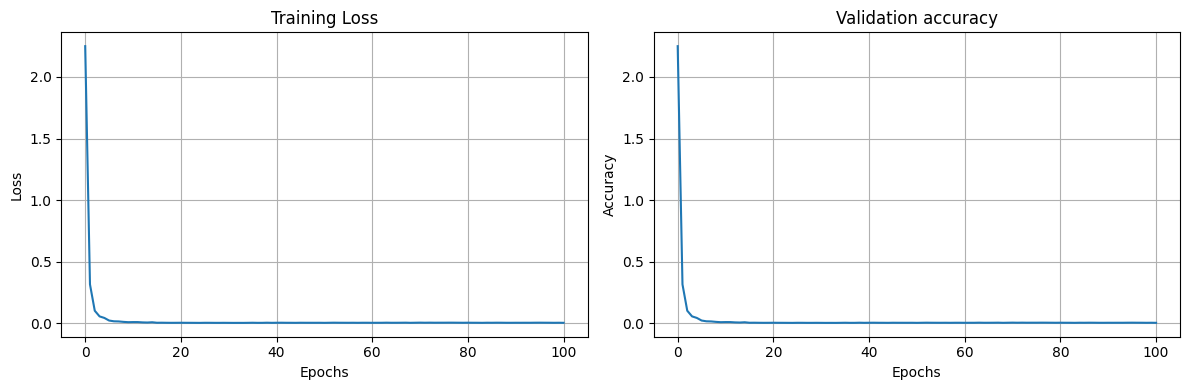

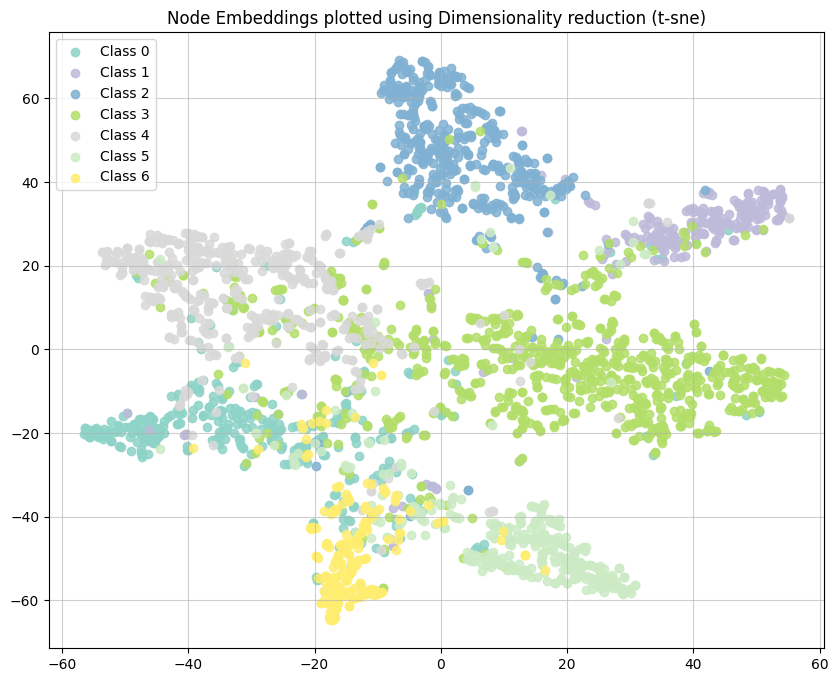

In [13]:
Graph_nn = GCN(
    inp_dim = data.x.shape[1], # 1433 features for CORA
    hidden_dim = 128,
    out_dim = num_classes,
    num_layers = 2
)
print(f"Number of parameter : {sum(p.numel() for p in Graph_nn.parameters())}\n")
print('Model Architecture:')
print(Graph_nn)
print()

Graph_nn, data = Graph_nn.to(device), data.to(device)

Graph_nn, train_loss, val_accuracy = train(Graph_nn, data, epochs = 100)

visualize_results(train_loss, val_accuracy)
visualize_embed(Graph_nn, data, num_classes)

## GCN using PyTorch's GCNConv layer

**DCNConv** : The graph convolutional operator from the "Semi-supervised Classification with Graph Convolutional Networks" paper.

<p style='text-align:center'><img src='https://miro.medium.com/v2/resize:fit:1100/format:webp/1*mxSjmL-mPk50f4KEiteVig.png'></p>

In [14]:
class GCN_torch(nn.Module):
    def __init__(self, inp_dim, hidden_dim, out_dim, num_layers=2, dropout=0.5):
        super(GCN_torch, self).__init__()
        self.num_layers = num_layers
        self.layers = nn.ModuleList()
        self.BN = nn.ModuleList()
        
        self.layers.append(GCNConv(inp_dim, hidden_dim))
        self.BN.append(nn.BatchNorm1d(hidden_dim))

        for _ in range(num_layers-2):
            self.layers.append(GCNConv(hidden_dim, hidden_dim))
            self.BN.append(nn.BatchNorm1d(hidden_dim))

        self.layers.append(GCNConv(hidden_dim, out_dim))
        self.dropout = dropout

    def forward(self, x, edge_index):
    
        for i in range(len(self.layers)-1):
            x = self.layers[i](x, edge_index)
            x = self.BN[i](x)
            if i == 0:
                res = torch.zeros_like(x, device=x.device)
            x = x+res
            res = torch.zeros_like(x, device=x.device)
            x = F.dropout(x, self.dropout, training = self.training)
            res = x
            
        out = self.layers[-1](x, edge_index)
        return out

Number of parameter : 184711

Model Architecture:
GCN_torch(
  (layers): ModuleList(
    (0): GCNConv(1433, 128)
    (1): GCNConv(128, 7)
  )
  (BN): ModuleList(
    (0): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)

..Training Model..

Epoch 0/100,  Loss : 2.6344,  Val acc : 0.1580
Epoch 20/100,  Loss : 0.0008,  Val acc : 0.7300
Epoch 40/100,  Loss : 0.0012,  Val acc : 0.7500
Epoch 60/100,  Loss : 0.0013,  Val acc : 0.7500
Epoch 80/100,  Loss : 0.0014,  Val acc : 0.7360
Epoch 100/100,  Loss : 0.0016,  Val acc : 0.7440

..Training Complete..



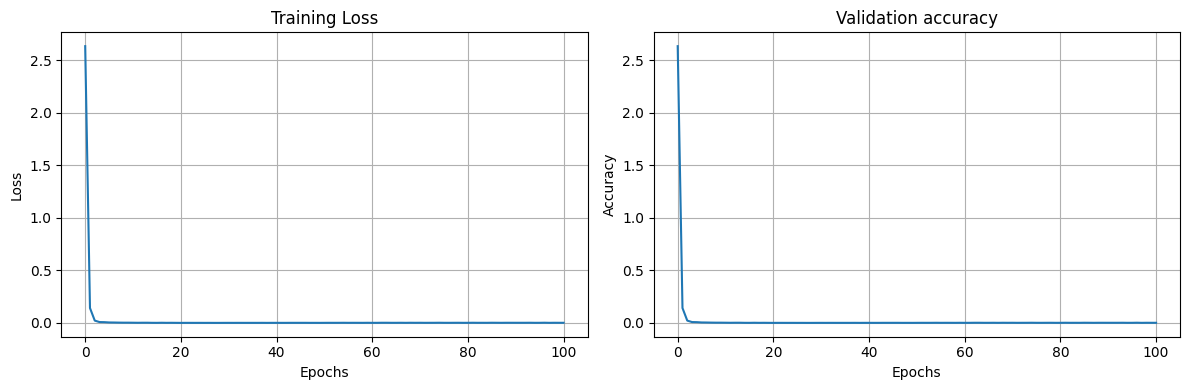

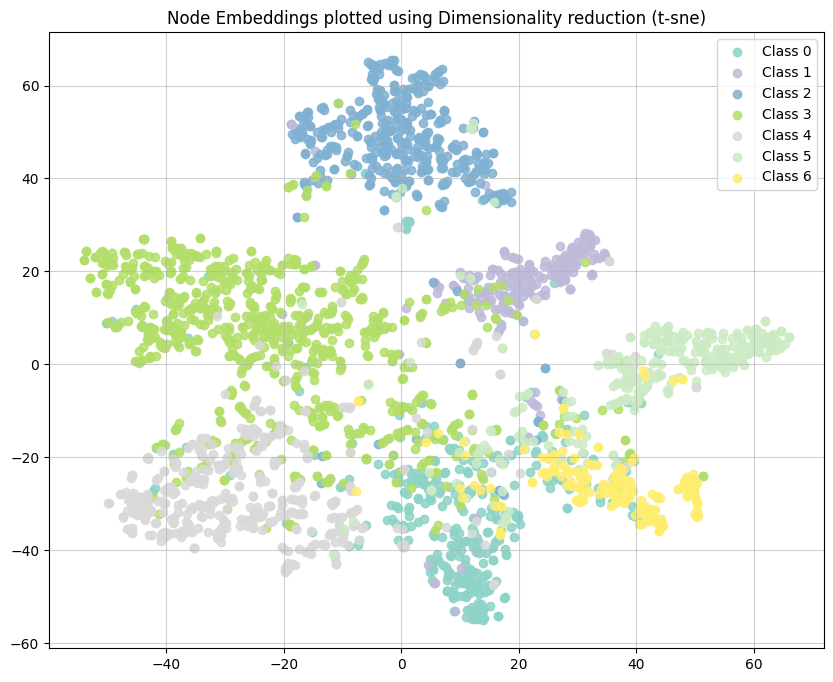

In [15]:
Graph_nn = GCN_torch(
    inp_dim = data.x.shape[1], # 1433 features for CORA
    hidden_dim = 128,
    out_dim = num_classes,
    num_layers = 2
)
print(f"Number of parameter : {sum(p.numel() for p in Graph_nn.parameters())}\n")
print('Model Architecture:')
print(Graph_nn)
print()

Graph_nn, data = Graph_nn.to(device), data.to(device)

Graph_nn, train_loss, val_accuracy = train(Graph_nn, data, epochs = 100)

visualize_results(train_loss, val_accuracy)
visualize_embed(Graph_nn, data, num_classes)